<h1>Making matplotlib plots more appealing<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Add-statistical-annotations-to-your-plot" data-toc-modified-id="Add-statistical-annotations-to-your-plot-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Add statistical annotations to your plot</a></span></li><li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 1</a></span></li></ul></div>

In this tutorial we will learn, how to make default matplotlib plots look more appealing with just a few extra commands.

Let's create some dummy data:

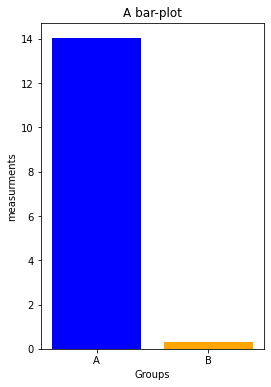

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg

# Generate some random dummy data:
np.random.seed(1)
Group_A = np.random.randn(10)*10+15
Group_B = np.random.randn(10)*10+2

# bar-plot:
fig=plt.figure(1, figsize=(4,6))
fig.clf()

plt.bar([1, 2], [Group_A.mean(), Group_B.mean()], 
        color=["blue", "orange"])

plt.xticks([1,2], labels=["A", "B"])
plt.xlabel("Groups")
plt.ylabel("measurments")
plt.title("A bar-plot")

plt.xlim([0.5, 2.5])

plt.tight_layout
plt.show()
#fig.savefig("barplot.pdf", dpi=120)

First, we change the bar-plot to a dot-plot, which provides a better visual impression of the data distributions. We will also adjust the fontsizes:

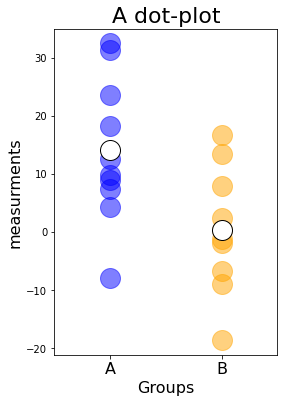

In [12]:
fig=plt.figure(1, figsize=(4,6))
fig.clf()

xVals = np.ones(Group_A.shape[0])

# Group A data:
plt.plot(xVals, Group_A, 'o', markeredgecolor="blue",
         markerfacecolor="blue", markersize=20, alpha=0.5)
plt.plot(1, Group_A.mean(), 'o', markeredgecolor="k",
         markerfacecolor="white", markersize=20)

# Group B data:
plt.plot(xVals+1, Group_B, 'o', markeredgecolor="orange",
         markerfacecolor="orange", markersize=20, alpha=0.5)
plt.plot(2, Group_B.mean(), 'o', markeredgecolor="k",
         markerfacecolor="white", markersize=20)


plt.xticks([1,2], labels=["A", "B"], fontsize=16)
plt.xlabel("Groups", fontsize=16)
plt.ylabel("measurments", fontsize=16)
plt.title("A dot-plot", fontsize=22, fontweight="normal")

plt.xlim([0.5, 2.5])

plt.tight_layout
plt.show()
#fig.savefig("dotplot.pdf", dpi=120)

We also increased the discernability of the individual data points  via the `alpha` value, which controls the transparency. The transparency also had an effect on the plot colors, which became a bit muted and look less like matplotlib's default color definitions.

Next, let's 
* remove parts of the black bounding box
    * (`ax.spines["top/right"].set_visible(False)`)
* change the thickness of the remaining bounds 
    * (`ax.spines["bottom/left"].set_linewidth(2)`)
* increase the size of the ticks 
    * (`ax.tick_params(width=2, length=10)`)

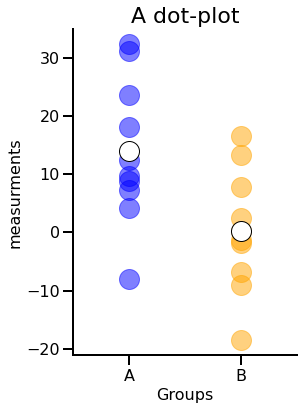

In [19]:
fig=plt.figure(1, figsize=(4,6))
fig.clf()

# Group A data:
plt.plot(xVals, Group_A, 'o', markeredgecolor="blue",
         markerfacecolor="blue", markersize=20, alpha=0.5)
plt.plot(1, Group_A.mean(), 'o', markeredgecolor="k",
         markerfacecolor="white", markersize=20)

# Group B data:
plt.plot(xVals+1, Group_B, 'o', markeredgecolor="orange",
         markerfacecolor="orange", markersize=20, alpha=0.5)
plt.plot(2, Group_B.mean(), 'o', markeredgecolor="k",
         markerfacecolor="white", markersize=20)

plt.xticks([1,2], labels=["A", "B"], fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Groups", fontsize=16)
plt.ylabel("measurments", fontsize=16)
plt.title("A dot-plot", fontsize=22, fontweight="normal")

# control the black bound box and tick sizes:
ax = plt.gca() # get current axis
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.tick_params(width=2, length=10)

plt.xlim([0.5, 2.5])

plt.tight_layout
plt.show()
#fig.savefig("dotplot.pdf", dpi=120)

While changing the **transparency** is a specific "hack" for dot- and scatter-plots, **removing parts of the black bounding box** and **increasing the fontsizes** work well for almost any matplotlib plot.

## Add statistical annotations to your plot

In [33]:
# let's check the statistics:
stats_results = pg.ttest(Group_A, Group_B, paired=False)
p_val = stats_results["p-val"].values[0].round(4)
print(f"p-value: {p_val}")

p-value: 0.0163


We now annotate our plot with the result from the statistical test:

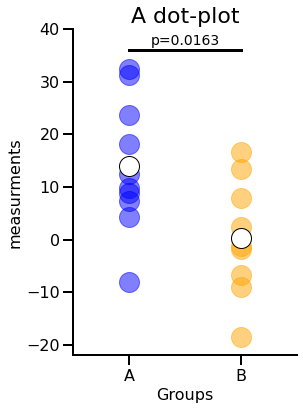

In [43]:
fig=plt.figure(1, figsize=(4,6))
fig.clf()

# Group A data:
plt.plot(xVals, Group_A, 'o', markeredgecolor="blue",
         markerfacecolor="blue", markersize=20, alpha=0.5)
plt.plot(1, Group_A.mean(), 'o', markeredgecolor="k",
         markerfacecolor="white", markersize=20)

# Group B data:
plt.plot(xVals+1, Group_B, 'o', markeredgecolor="orange",
         markerfacecolor="orange", markersize=20, alpha=0.5)
plt.plot(2, Group_B.mean(), 'o', markeredgecolor="k",
         markerfacecolor="white", markersize=20)

# statistical annotations:
h = 36 # height of the horizontal bar
annotation_offset = 0.5 # offset of the stats-annotation
plt.plot([1, 2], [h, h], '-k', lw=3)
plt.text(1.5, h+annotation_offset, 
         "p="+str(p_val), 
         ha='center', va='bottom', fontsize=14)

#plt.text(1.5, h+annotation_offset, stats_results["p-val"].values, 
#         fontsize=14)

plt.xticks([1,2], labels=["A", "B"], fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Groups", fontsize=16)
plt.ylabel("measurments", fontsize=16)
plt.title("A dot-plot", fontsize=22, fontweight="normal")

# control the black bound box and tick sizes:
ax = plt.gca() # get current axis
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.tick_params(width=2, length=10)

plt.xlim([0.5, 2.5])
plt.ylim([-22, 40])

plt.tight_layout
plt.show()
#fig.savefig("dotplot_with_stats.pdf", dpi=120)

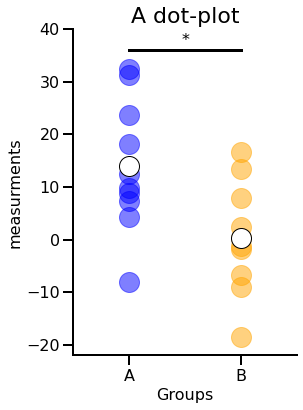

In [45]:
def asteriskscheck(pval):
    if stats_results["p-val"].values<=0.0001:
        asterisks="****"
    elif stats_results["p-val"].values<=0.001: 
        asterisks="***"
    elif stats_results["p-val"].values<=0.01: 
        asterisks="**"
    elif stats_results["p-val"].values<=0.05: 
        asterisks="*"
    else: 
        asterisks="n.s."
    return asterisks

fig=plt.figure(1, figsize=(4,6))
fig.clf()

# Group A data:
plt.plot(xVals, Group_A, 'o', markeredgecolor="blue",
         markerfacecolor="blue", markersize=20, alpha=0.5)
plt.plot(1, Group_A.mean(), 'o', markeredgecolor="k",
         markerfacecolor="white", markersize=20)

# Group B data:
plt.plot(xVals+1, Group_B, 'o', markeredgecolor="orange",
         markerfacecolor="orange", markersize=20, alpha=0.5)
plt.plot(2, Group_B.mean(), 'o', markeredgecolor="k",
         markerfacecolor="white", markersize=20)

# statistical annotations:
h = 36 # height of the horizontal bar
annotation_offset = 0.5 # offset of the stats-annotation
plt.plot([1, 2], [h, h], '-k', lw=3)
plt.text(1.5, h+annotation_offset, 
         asteriskscheck(p_val), 
         ha='center', va='bottom', fontsize=16)

plt.xticks([1,2], labels=["A", "B"], fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Groups", fontsize=16)
plt.ylabel("measurments", fontsize=16)
plt.title("A dot-plot", fontsize=22, fontweight="normal")

# control the black bound box and tick sizes:
ax = plt.gca() # get current axis
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.tick_params(width=2, length=10)

plt.xlim([0.5, 2.5])
plt.ylim([-22, 40])

plt.tight_layout
plt.show()
#fig.savefig("dotplot_with_stats.pdf", dpi=120)

## Exercise 1
1. Implement an if-statement to check for normality and let your script choose the correct significance test (Student's *t*-test or Mann-Whitney-U). Hint: *Pingoiun* has a normality-check function as well as the corresponding test-functions.
1. Complete the decision tree for the stars-annotation ($p\lt0.0001 \, \rightarrow \mbox{****}\,$). You can use the notation convention from [*GraphPad*](https://www.graphpad.com/support/faq/what-is-the-meaning-of--or--or--in-reports-of-statistical-significance-from-prism-or-instat/):
| Symbol | Meaning | 
|:--:|:--:|
|n.s. | $p\gt$0.05 |
|$\mbox{*}$ | $p\le$0.05 |
|$\mbox{**}$ | $p\le$0.01 |
|$\mbox{***}$ | $p\le$0.001 |
|$\mbox{****}$ | $p\le$0.0001 |
2. Replace the *p*-value by the stars-annotation in the plot.
4. Display the *p*-value below the stars-annotation.

signficance tets applied: ttest
p-value: 0.0163


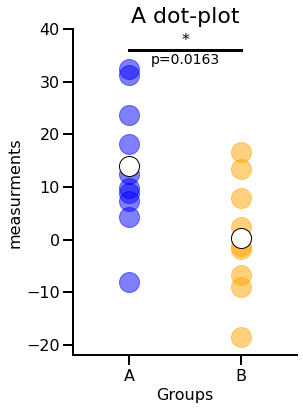

In [47]:
# Your solution 1 here:


<details>
<summary><strong>Toggle solution</strong></summary>

```python
normtest_A = pg.normality(Group_A)
normtest_B = pg.normality(Group_B)

if (normtest_A['normal'].values) and (normtest_B['normal'].values): 
    stats_results = pg.ttest(Group_A, Group_B, paired=False)
    test_type="ttest"
else:
    stats_results = pg.mwu(Group_A, Group_B, alternative='two-sided')
    test_type="mwu"
p_val = stats_results["p-val"].values[0].round(4)
print(f"signficance tets applied: {test_type}")
print(f"p-value: {p_val}")

def asteriskscheck(pval):
    if stats_results["p-val"].values<=0.0001:
        asterisks="****"
    elif stats_results["p-val"].values<=0.001: 
        asterisks="***"
    elif stats_results["p-val"].values<=0.01: 
        asterisks="**"
    elif stats_results["p-val"].values<=0.05: 
        asterisks="*"
    else: 
        asterisks="n.s."
    return asterisks

fig=plt.figure(1, figsize=(4,6))
fig.clf()

# Group A data:
plt.plot(xVals, Group_A, 'o', markeredgecolor="blue",
         markerfacecolor="blue", markersize=20,
         alpha=0.5)
plt.plot(1, Group_A.mean(), 'o', markeredgecolor="k",
         markerfacecolor="white", markersize=20)

# Group B data:
plt.plot(xVals+1, Group_B, 'o', markeredgecolor="orange",
         markerfacecolor="orange", markersize=20,
         alpha=0.5)
plt.plot(2, Group_B.mean(), 'o', markeredgecolor="k",
         markerfacecolor="white", markersize=20)

# statistical annotations:
h = 36 # height of the horizontal bar
annotation_offset = 0.5 # offset of the stats-annotation
plt.plot([1, 2], [h, h], '-k', lw=3)
plt.text(1.5, h+annotation_offset, 
         asteriskscheck(p_val), 
         ha='center', va='bottom', fontsize=16)
plt.text(1.5, h-annotation_offset, 
         "p="+str(p_val), 
         ha='center', va='top', fontsize=14)

plt.xticks([1,2], labels=["A", "B"], fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Groups", fontsize=16)
plt.ylabel("measurments", fontsize=16)
plt.title("A dot-plot", fontsize=22, fontweight="normal")

# control the black bound box and tick sizes:
ax = plt.gca() # get current axis
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)
ax.tick_params(width=2, length=10)

plt.xlim([0.5, 2.5])
plt.ylim([-22, 40])

plt.tight_layout
plt.show()
#fig.savefig("dotplot_with_stats.pdf", dpi=120)
    
``` 
</script>
</details>